In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('initialized')
except:
    print("Pass")
    # Invalid device or cannot modify virtual devices once initialized.
    pass
from tensorflow import keras
import numpy as np 
import cv2
import os 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json
from tensorflow.keras.applications.vgg16 import VGG16

initialized


In [2]:

IMG_SAVE_PATH = 'image_data'
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

In [3]:
CLASS_MAP = {
    "rock": 0,
    "paper": 1,
    "scissors": 2,
    "none": 3
}
NUM_CLASSES = len(CLASS_MAP)


In [4]:
train_generator = train_datagen.flow_from_directory(
        "./dataset/train",
        target_size=(227,227),
        batch_size=20,
        class_mode="categorical")

validation_generator = validation_datagen.flow_from_directory(
        "./dataset/test",  
        target_size=(227,227),  
        batch_size=10,
        class_mode='categorical')


Found 792 images belonging to 4 classes.
Found 88 images belonging to 4 classes.


In [6]:
train_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [7]:
model = keras.models.Sequential()

In [8]:
model.add(VGG16(include_top=False,input_shape=(227,227,3)))

In [9]:
model.add(keras.layers.Dropout(0.5))

In [10]:
model.add(keras.layers.Convolution2D(NUM_CLASSES, (1, 1), padding='valid'))

In [11]:
model.add(keras.layers.Activation('relu'))

In [12]:
model.add(keras.layers.GlobalAveragePooling2D())

In [13]:
model.add(keras.layers.Activation('softmax'))

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 512)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 7, 7, 4)           2052      
_________________________________________________________________
activation (Activation)      (None, 7, 7, 4)           0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 4)                 0         
_________________________________________________________________
activation_1 (Activation)    (None, 4)                 0         
Total params: 14,716,740
Trainable params: 14,716,740
Non-trainable params: 0
____________________________________________

In [14]:
from tensorflow.keras.optimizers import Adam
model.compile(
    optimizer=Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)              

/home/namangarg110/.local/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [15]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=40,
      verbose=2,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/40
8/8 - 20s - loss: 1.2990 - accuracy: 0.4437 - val_loss: 1.0784 - val_accuracy: 0.5750
Epoch 2/40
8/8 - 6s - loss: 0.6564 - accuracy: 0.7875 - val_loss: 0.4668 - val_accuracy: 0.9500
Epoch 3/40
8/8 - 6s - loss: 0.0824 - accuracy: 0.9937 - val_loss: 0.6273 - val_accuracy: 0.7875
Epoch 4/40
8/8 - 6s - loss: 0.0541 - accuracy: 0.9875 - val_loss: 1.5350 - val_accuracy: 0.8125
Epoch 5/40
8/8 - 6s - loss: 0.0793 - accuracy: 0.9812 - val_loss: 1.5284 - val_accuracy: 0.8000
Epoch 6/40
8/8 - 6s - loss: 0.0859 - accuracy: 0.9688 - val_loss: 1.1166 - val_accuracy: 0.8000
Epoch 7/40
8/8 - 6s - loss: 0.0347 - accuracy: 1.0000 - val_loss: 1.6434 - val_accuracy: 0.7750
Epoch 8/40
8/8 - 6s - loss: 0.0086 - accuracy: 1.0000 - val_loss: 1.9381 - val_accuracy: 0.8125
Epoch 9/40
8/8 - 6s - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.8270 - val_accuracy: 0.8750
Epoch 10/40
8/8 - 11s - loss: 0.0072 - accuracy: 0.9934 - val_loss: 0.6173 - val_accuracy: 0.9375
Epoch 11/40
8/8 - 6s - loss: 0.0019 -

Text(0.5, 1.0, 'Training and validation loss')

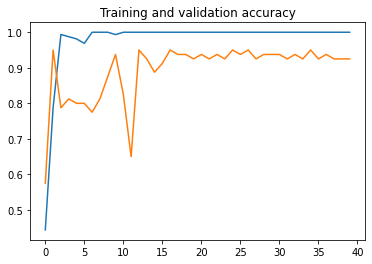

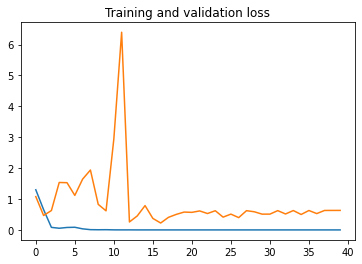

In [16]:
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [17]:
model.save("rock-paper-scissors-model.h5")

In [18]:
from numba import cuda 
device = cuda.get_current_device()
device.reset()